In [87]:
import pandas as pd  #data processing and data level operation
import numpy as np  # Linear Algebra
import os, re
import string
import nltk
from nltk.corpus import stopwords

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

%matplotlib inline

In [70]:
#Loading data
train = pd.read_csv('/content/labeledTrainData.tsv',delimiter = '\t')
test = pd.read_csv('/content/testData.tsv',delimiter = '\t')

train.shape, test.shape


((11646, 3), (12884, 2))

In [71]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [72]:
train['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [73]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [74]:
test['review'][0]

"Naturally in a film who's main themes are of mortality, nostalgia, and loss of innocence it is perhaps not surprising that it is rated more highly by older viewers than younger ones. However there is a craftsmanship and completeness to the film which anyone can enjoy. The pace is steady and constant, the characters full and engaging, the relationships and interactions natural showing that you do not need floods of tears to show emotion, screams to show fear, shouting to show dispute or violence to show anger. Naturally Joyce's short story lends the film a ready made structure as perfect as a polished diamond, but the small changes Huston makes such as the inclusion of the poem fit in neatly. It is truly a masterpiece of tact, subtlety and overwhelming beauty."

In [75]:
print ("number of rows for sentiment 1: {}".format(len(train[train.sentiment == 1])))
print ( "number of rows for sentiment 0: {}".format(len(train[train.sentiment == 0])))

number of rows for sentiment 1: 5894
number of rows for sentiment 0: 5752


In [76]:
train.groupby('sentiment').describe().transpose()

sentiment                                                      0  \
id     count                                                5752   
       unique                                               5752   
       top                                                7759_3   
       freq                                                    1   
review count                                                5752   
       unique                                               5727   
       top     When i got this movie free from my job, along ...   
       freq                                                    3   

sentiment                                                      1  
id     count                                                5894  
       unique                                               5894  
       top                                                5814_8  
       freq                                                    1  
review count                                                5894  
       unique                                               5886  
       top     I used to watch this show when I was a little ...  
       freq                                                    2

In [77]:
#Creating a new col
train['length'] = train['review'].apply(len)
train.head()

,id,sentiment,review,length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231


<Axes: ylabel='Frequency'>

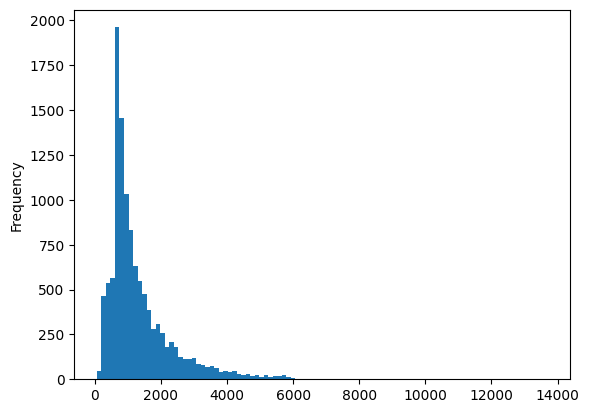

In [78]:
#Histogram of count of letters
train['length'].plot.hist(bins = 100)

In [79]:
train.length.describe()

count    11646.000000
mean      1335.986519
std       1015.913488
min         65.000000
25%        702.000000
50%        986.000000
75%       1625.000000
max      13708.000000
Name: length, dtype: float64

In [80]:
#train[train['length'] == 13708]['review']
train[train['length'] == 13708]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

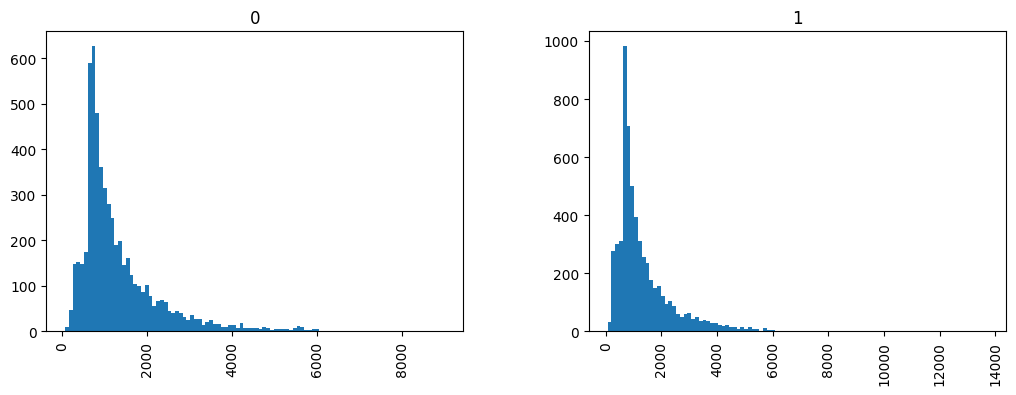

In [81]:
train.hist(column='length', by='sentiment', bins=100,figsize=(12,4))

In [82]:
from bs4 import BeautifulSoup

#Creating a function for cleaning of data
def clean_text(raw_text):
    # 1. remove HTML tags
    raw_text = BeautifulSoup(raw_text).get_text()

    # 2. removing all non letters from text
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)

    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()

    # 4. Create variable which contain set of stopwords
    stops = set(stopwords.words("english"))

    # 5. Remove stop word & returning
    return [w for w in words if not w in stops]

In [89]:
#Cleaning review and also adding a new col as its len count of words
import nltk
nltk.download('stopwords')
train['clean_review'] = train['review'].apply(clean_text)
train['length_clean_review'] = train['clean_review'].apply(len)
train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,sentiment,review,length,clean_review,length_clean_review
0,5814_8,1,With all this stuff going down at the moment w...,2302,"[stuff, going, moment, mj, started, listening,...",219
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,"[classic, war, worlds, timothy, hines, enterta...",84
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,"[film, starts, manager, nicholas, bell, giving...",240
3,3630_4,0,It must be assumed that those who praised this...,2245,"[must, assumed, praised, film, greatest, filme...",189
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,"[superbly, trashy, wondrously, unpretentious, ...",210


In [90]:
train.describe()

,sentiment,length,length_clean_review
count,11646.000000,11646.000000,11646.000000
mean,0.506097,1335.986519,120.294350
std,0.499984,1015.913488,91.808955
min,0.000000,65.000000,6.000000
25%,0.000000,702.000000,63.000000
50%,1.000000,986.000000,89.000000
75%,1.000000,1625.000000,146.000000
max,1.000000,13708.000000,1416.000000


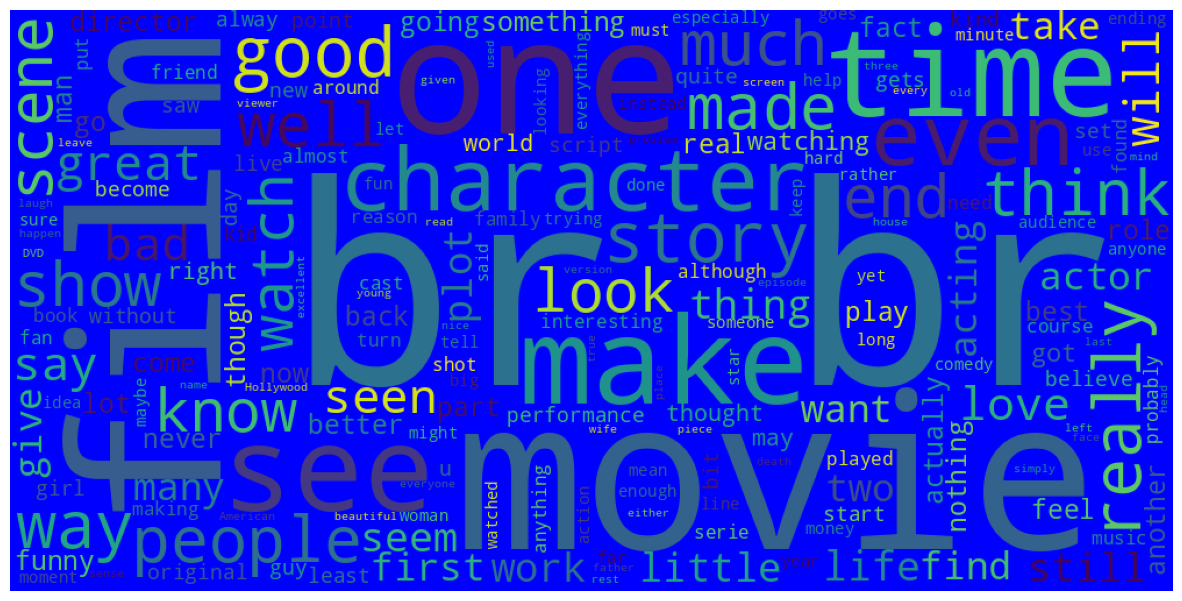

In [92]:
#Plot wordcloud
word_cloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'blue').generate(
                        ''.join(train['review']))

plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

#word_cloud.to_file('aa.png')   #for saving file

In [93]:
#/*Vectorization
#Now we'll convert each review, represented as a list of tokens into a vector that machine learning models can understand.

# We'll do that in three steps using the bag-of-words model:

# 1Count how many times does a word occur in each message (Known as term frequency)

# 2Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

# 3Normalize the vectors to unit length, to abstract from the original text length (L2 norm) */

# Let's begin the first step:

from sklearn.feature_extraction.text import CountVectorizer

In [94]:
# Might take awhile...
bow_transform = CountVectorizer(analyzer=clean_text).fit(train['review'])  #bow = bag of word

# Print total number of vocab words
print(len(bow_transform.vocabulary_))

54791


In [95]:
review1 = train['review'][1]
print(review1)

\The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \"critics\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \"critics\" perceive to be its shortcomings."


In [96]:
bow1 = bow_transform.transform([review1])
print(bow1)
print(bow1.shape)

  (0, 855)	1
  (0, 1368)	1
  (0, 2114)	1
  (0, 3751)	1
  (0, 5416)	2
  (0, 8587)	3
  (0, 9228)	1
  (0, 10886)	1
  (0, 10890)	3
  (0, 11010)	1
  (0, 12874)	1
  (0, 14660)	1
  (0, 14738)	1
  (0, 14915)	2
  (0, 15580)	1
  (0, 15674)	1
  (0, 15679)	2
  (0, 15767)	1
  (0, 16201)	1
  (0, 16207)	1
  (0, 16210)	1
  (0, 16791)	1
  (0, 16863)	1
  (0, 16864)	1
  (0, 17003)	1
  :	:
  (0, 33454)	1
  (0, 33744)	2
  (0, 34377)	1
  (0, 34622)	1
  (0, 35659)	1
  (0, 35685)	1
  (0, 37310)	1
  (0, 38357)	1
  (0, 39015)	1
  (0, 39420)	1
  (0, 40194)	1
  (0, 43692)	1
  (0, 44493)	1
  (0, 45513)	1
  (0, 45973)	1
  (0, 46951)	1
  (0, 48747)	1
  (0, 49086)	1
  (0, 49281)	1
  (0, 52143)	1
  (0, 52848)	1
  (0, 52966)	1
  (0, 53207)	2
  (0, 53999)	1
  (0, 54345)	1
(1, 54791)


In [102]:
print(bow_transform.get_feature_names_out()[53207])
print(bow_transform.get_feature_names_out()[53999])

wells
worlds


In [103]:
#Creating bag of words for our review variable
review_bow = bow_transform.transform(train['review'])

In [104]:
print('Shape of Sparse Matrix: ', review_bow.shape)
print('Amount of Non-Zero occurences: ', review_bow.nnz)

Shape of Sparse Matrix:  (11646, 54791)
Amount of Non-Zero occurences:  1148760


In [105]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.18002934122829603


In [106]:
# TF-IDF
# Term Frequency - Inverse Document Frequency.

# After the counting, the term weighting and normalization can be done with tf-idf

# TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

# IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 54345)	0.062011385647826524
  (0, 53999)	0.11021763876509381
  (0, 53207)	0.24189222659115775
  (0, 52966)	0.06204946573588766
  (0, 52848)	0.07072363412061822
  (0, 52143)	0.06758386695469006
  (0, 49281)	0.08489717914953307
  (0, 49086)	0.11144873177565726
  (0, 48747)	0.05457459193057126
  (0, 46951)	0.10487815478462068
  (0, 45973)	0.08898643769344082
  (0, 45513)	0.11458224840733243
  (0, 44493)	0.11209828283608939
  (0, 43692)	0.12040650537685699
  (0, 40194)	0.11177049995313228
  (0, 39420)	0.13423279403534874
  (0, 39015)	0.08454992277910993
  (0, 38357)	0.06037811846422477
  (0, 37310)	0.07894681346046269
  (0, 35685)	0.13008751028831872
  (0, 35659)	0.04180214792825741
  (0, 34622)	0.11888068486289077
  (0, 34377)	0.06610602423716687
  (0, 33744)	0.14833265406931076
  (0, 33454)	0.08205428348703565
  :	:
  (0, 17003)	0.10168098699899156
  (0, 16864)	0.13423279403534874
  (0, 16863)	0.10340721967903167
  (0, 16791)	0.05482528774652369
  (0, 16210)	0.061431479915622735
  

In [107]:
# We'll go ahead and check what is the IDF (inverse document frequency) of the word "war" and of word "book"?
print(tfidf_transformer.idf_[bow_transform.vocabulary_['war']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['book']])

4.033083009579956
3.8660289249167894


In [108]:
# To transform the entire bag-of-words corpus into TF-IDF corpus at once:

review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(11646, 54791)


In [109]:
# Modeling Part
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['review'], train['sentiment'], test_size=0.22, random_state=101)

len(X_train), len(X_test), len(X_train) + len(X_test)

(9083, 2563, 11646)

In [110]:
# Result Function
from sklearn.metrics import classification_report
#Predicting & Stats Function
def pred(predicted,compare):
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()

    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))


In [111]:
# Training Model

In [112]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          4148   315
1           192  4428

Classification paradox :------->>
Accuracy :-  94.42

False Negative Rate :-  4.16

False Postive Rate :-  7.06

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4463
           1       0.93      0.96      0.95      4620

    accuracy                           0.94      9083
   macro avg       0.94      0.94      0.94      9083
weighted avg       0.94      0.94      0.94      9083



In [113]:
#Test Set Result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          1104   185
1           121  1153

Classification paradox :------->>
Accuracy :-  88.06

False Negative Rate :-  9.5

False Postive Rate :-  14.35

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1289
           1       0.86      0.91      0.88      1274

    accuracy                           0.88      2563
   macro avg       0.88      0.88      0.88      2563
weighted avg       0.88      0.88      0.88      2563



In [114]:
# Naive Bayes Model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          4171   292
1           275  4345

Classification paradox :------->>
Accuracy :-  93.76

False Negative Rate :-  5.95

False Postive Rate :-  6.54

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4463
           1       0.94      0.94      0.94      4620

    accuracy                           0.94      9083
   macro avg       0.94      0.94      0.94      9083
weighted avg       0.94      0.94      0.94      9083



In [115]:
#Result on Test Case
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          1117   172
1           151  1123

Classification paradox :------->>
Accuracy :-  87.4

False Negative Rate :-  11.85

False Postive Rate :-  13.34

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1289
           1       0.87      0.88      0.87      1274

    accuracy                           0.87      2563
   macro avg       0.87      0.87      0.87      2563
weighted avg       0.87      0.87      0.87      2563



In [116]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators = 500)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          4463     0
1             0  4620

Classification paradox :------->>
Accuracy :-  100.0

False Negative Rate :-  0.0

False Postive Rate :-  0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4463
           1       1.00      1.00      1.00      4620

    accuracy                           1.00      9083
   macro avg       1.00      1.00      1.00      9083
weighted avg       1.00      1.00      1.00      9083



In [117]:
#Test Set Result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX ------->> 
col_0         0     1
sentiment            
0          1100   189
1           162  1112

Classification paradox :------->>
Accuracy :-  86.31

False Negative Rate :-  12.72

False Postive Rate :-  14.66

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1289
           1       0.85      0.87      0.86      1274

    accuracy                           0.86      2563
   macro avg       0.86      0.86      0.86      2563
weighted avg       0.86      0.86      0.86      2563



In [118]:
# Final Model Will be Logistic Regression
#Saving Output
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_logit = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline_logit.fit(train['review'],train['sentiment'])
test['sentiment'] = pipeline_logit.predict(test['review'])

In [119]:
output = test[['id','sentiment']]
print(output)

             id  sentiment
0      12311_10          1
1        8348_2          0
2        5828_4          1
3        7186_2          1
4       12128_7          1
...         ...        ...
12879    8631_1          1
12880    7153_8          1
12881     847_2          0
12882   4418_10          1
12883  12320_10          1

[12884 rows x 2 columns]


In [123]:
# Submission File
output.to_csv( "output.csv", index=False, quoting=3 )

In [125]:
print(output)

             id  sentiment
0      12311_10          1
1        8348_2          0
2        5828_4          1
3        7186_2          1
4       12128_7          1
...         ...        ...
12879    8631_1          1
12880    7153_8          1
12881     847_2          0
12882   4418_10          1
12883  12320_10          1

[12884 rows x 2 columns]
